In [654]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as astro 
import pandas as pd
#import camb as cb
%matplotlib inline

In [655]:
from pylab import imshow
from numpy import random
from PIL import Image
from scipy.fftpack import fft 
from scipy.fftpack import ifft 
from numpy.linalg import inv
from __future__ import division

In [656]:
#hitsmap part 
Hitmap=np.random.rand(500,500) #generate random array and graph 
np.clip(Hitmap,0,1) 
#Hitmap=[[0.22,0.84,0.55],[0.41,0.06,0.67],[0.90,0.72,0.33]]
#Hitmap=[[0.22,0.84,0.57,0.46,0.93],[0.41,0.06,0.72,0.38,0.16],[0.91,0.38,0.67,0.99,0.44],[0.74,0.93,0.62,0.27,0.46],[0.74,0.35,0.85,0.65,0.38]]

array([[0.86635178, 0.71887908, 0.39498087, ..., 0.44357464, 0.33178791,
        0.43920416],
       [0.96383843, 0.10265291, 0.91613166, ..., 0.92858867, 0.56429654,
        0.67181529],
       [0.29440349, 0.23597606, 0.65505698, ..., 0.31140641, 0.00593439,
        0.27794196],
       ...,
       [0.03993594, 0.51010537, 0.23228885, ..., 0.65084831, 0.83520932,
        0.37712446],
       [0.36750584, 0.05431165, 0.35416068, ..., 0.89196727, 0.72917383,
        0.29975109],
       [0.53499299, 0.39676363, 0.62412584, ..., 0.04503804, 0.83690041,
        0.32706257]])

Array of Hitmap [[0.86635178 0.71887908 0.39498087 ... 0.44357464 0.33178791 0.43920416]
 [0.96383843 0.10265291 0.91613166 ... 0.92858867 0.56429654 0.67181529]
 [0.29440349 0.23597606 0.65505698 ... 0.31140641 0.00593439 0.27794196]
 ...
 [0.03993594 0.51010537 0.23228885 ... 0.65084831 0.83520932 0.37712446]
 [0.36750584 0.05431165 0.35416068 ... 0.89196727 0.72917383 0.29975109]
 [0.53499299 0.39676363 0.62412584 ... 0.04503804 0.83690041 0.32706257]]


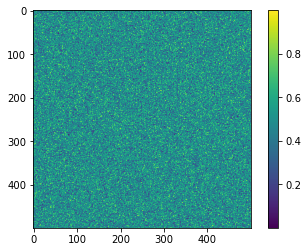

In [657]:
plt.colorbar(imshow(Hitmap))
imshow(Hitmap)
print('Array of Hitmap',Hitmap)

In [658]:
M=np.mean(Hitmap)
print('mean of Hitmap',M) 
length=len(Hitmap)
print('length of Hitmap',length)

mean of Hitmap 0.4999920970084517
length of Hitmap 500


In [659]:
#Fourrier Space Amplitude

In [660]:
#A_noise

In [661]:
Spectrum=np.fft.fft(Hitmap) #fft of Hitmap
#Spectrum=np.fft.fft2(Hitmap) #fft2 of Hitmap
#Spectrum=np.fft.fftn(Hitmap) #fftn of Hitmap
Abs=np.abs(Spectrum)
#print(Spectrum)
#print(Abs)

Inverse=inv(np.matrix(Hitmap))
#Transpose=np.transpose(Hitmap)

A_noise= Inverse * Abs 
#A_noise=np.abs(A_n*A_n)#squaring the amplitude

In [662]:
#plt.colorbar(imshow(Abs))
#imshow(Abs)

In [663]:
#plt.colorbar(imshow(Inverse))
#imshow(Inverse)

A_noise [[  1.          20.97732343  -3.48415697 ... -51.73054533  -3.48415697
   20.97732343]
 [  1.           0.19563342  -3.1580937  ... -14.68438377  -3.1580937
    0.19563342]
 [  1.          24.78259168  -0.31331287 ... -30.89296756  -0.31331287
   24.78259168]
 ...
 [  1.          14.06910203   8.08324235 ... -10.49263299   8.08324235
   14.06910203]
 [  1.          25.5836843   -4.38102282 ... -24.36838551  -4.38102282
   25.5836843 ]
 [  1.          32.94907469   3.21045731 ... -52.69898403   3.21045731
   32.94907469]]


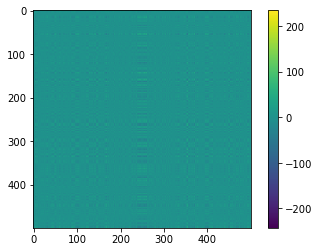

In [664]:
plt.colorbar(imshow(A_noise))
imshow(A_noise)
print('A_noise',A_noise) 
#the ends have always been uniform
#there may be something wrong with the fourier transform

In [665]:
def Noisemap(Hitmap,A_noise): 
    rand=np.random.rand(500,500) #random array 
    np.clip(rand,0,1) 
    print('rand',rand)
    Inital = (np.fft.ifft(A_noise))*rand #inverse fourier transform to turn into real space
    Final = np.abs(Inital/Hitmap)
    print('Inital',Inital)
    print('Final',Final)   
    plt.colorbar(imshow(Final))
    imshow(Final)

rand [[0.62373169 0.37276322 0.14981517 ... 0.06439694 0.82917288 0.22479672]
 [0.76553548 0.1714622  0.1119077  ... 0.55461309 0.93705484 0.76899464]
 [0.33808587 0.54577985 0.81552757 ... 0.78471733 0.79772275 0.79074741]
 ...
 [0.86070466 0.69563578 0.48621457 ... 0.45858076 0.78804163 0.4050362 ]
 [0.6546422  0.40926445 0.69106039 ... 0.34065606 0.03599317 0.51401144]
 [0.87647665 0.10146662 0.72052773 ... 0.00196319 0.49366786 0.80596092]]
Inital [[-0.69686481+0.00000000e+00j  0.91957339-4.10539508e-16j
  -0.21412498-8.19665636e-17j ...  0.07109796-7.68836494e-17j
  -1.18510445+4.41247958e-16j  0.55455332+2.21108948e-16j]
 [-0.22456135+0.00000000e+00j  0.08018241+1.18023992e-17j
  -0.03527139-2.49603187e-17j ...  0.13682822-5.74344934e-17j
  -0.29534362+2.04368644e-16j  0.3596119 -3.96633817e-17j]
 [-0.20518208+0.00000000e+00j  0.59203636-1.90021954e-16j
  -1.10203397-1.15893438e-17j ...  0.79615599+2.01010305e-16j
  -1.07797407-2.49985758e-17j  0.85776567+1.00759897e-16j]
 ...
 [

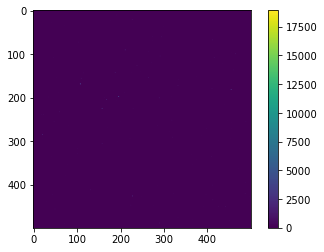

In [666]:
Noisemap(Hitmap,A_noise)